<a href="https://colab.research.google.com/github/shqtbz143/202135992/blob/202135992-%EC%95%88%EC%84%9C%ED%98%84/08_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#08-3 합성곱 신경망의 시각화

In [1]:
!wget https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5

--2023-11-13 02:17:30--  https://github.com/rickiepark/hg-mldl/raw/master/best-cnn-model.h5
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5 [following]
--2023-11-13 02:17:31--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/best-cnn-model.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4046712 (3.9M) [application/octet-stream]
Saving to: ‘best-cnn-model.h5’

best-cnn-model.h5   100%[===================>]   3.86M  14.7MB/s    in 0.3s    

2023-11-13 02:17:32 (14.7 MB/s) - ‘best-cnn-model.h5’ saved [4046712/4046712]



In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [7]:
model.add(keras.layers.MaxPooling2D(2))

In [8]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))

model.add(keras.layers.MaxPooling2D(2))

In [9]:
model.layers

In [10]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [11]:
no_training_model = keras.Sequential()

no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = (28, 28, 1)))

In [12]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [13]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [14]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [15]:
conv_acti = keras.Model(model.input, model.layers[0].output)

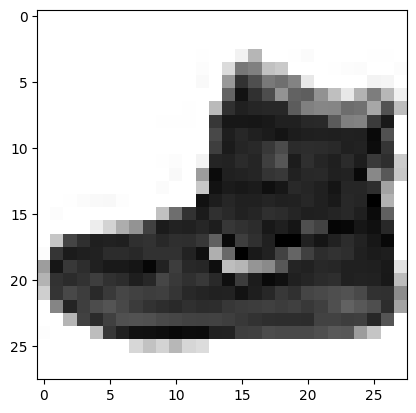

In [18]:
import matplotlib.pyplot as plt

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()


In [20]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0

feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 204ms/step


In [21]:
print(feature_maps.shape)

(1, 28, 28, 32)


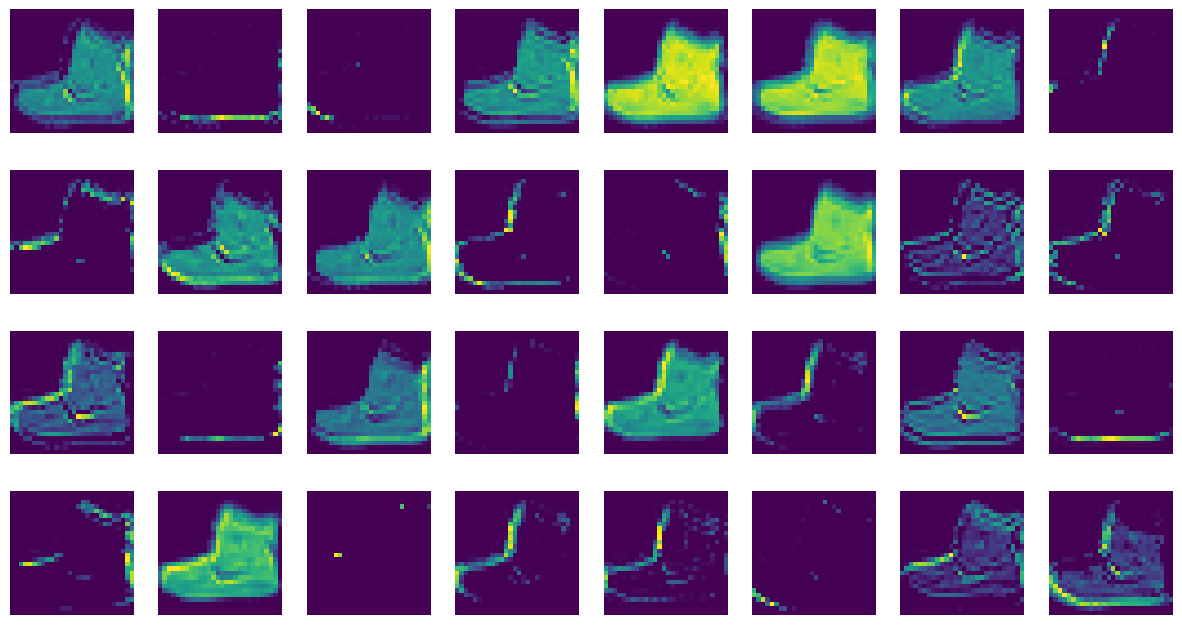

In [23]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i,j].axis('off')

plt.show()


In [24]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [27]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 86ms/step


In [28]:
print(feature_maps.shape)

(1, 14, 14, 64)


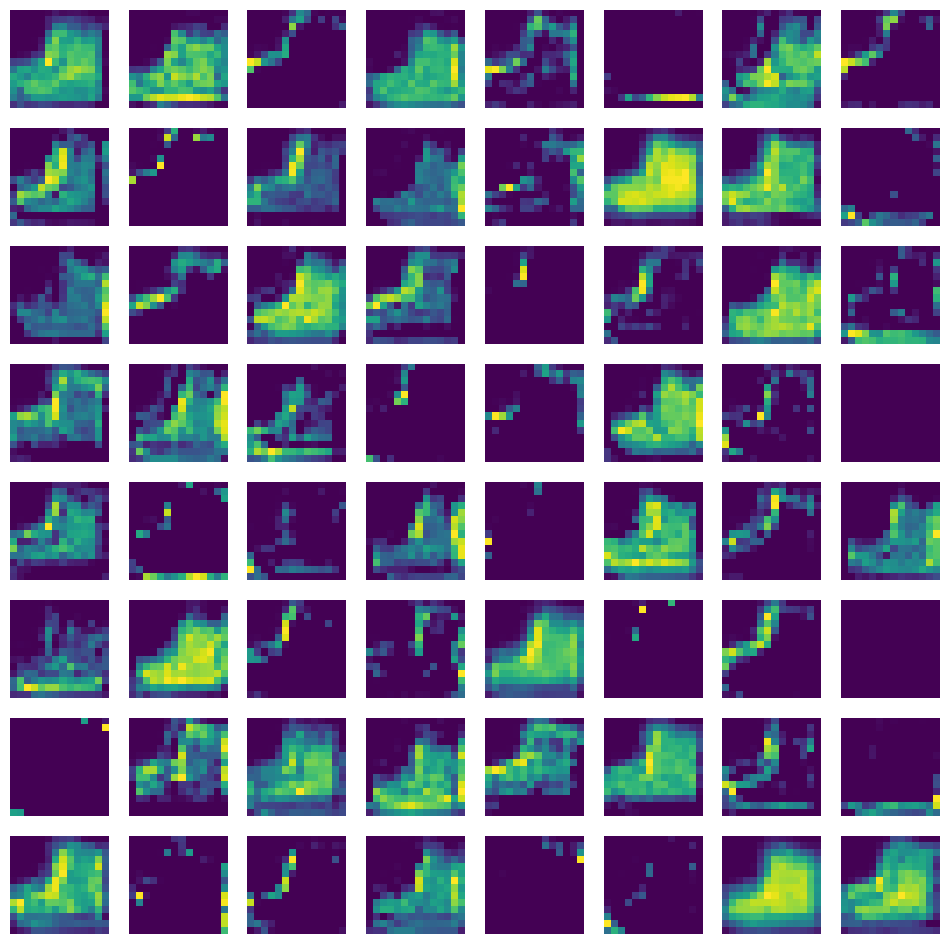

In [29]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))
for i in range(8) :
  for j in range(8) :
    axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i, j].axis('off')

plt.show()